# Laboratory Exercise 2: Data Cleaning and Preprocessing

**Name:** Lorenzo Bela, Robert Callorina, Kean Guzon

**Section:** 58036

**Date:** January 26 2026

**Dataset:** CIFAR-10

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from PIL import Image
from pathlib import Path

## Part B: Load Raw Dataset

In [35]:
path = Path('../../lab01_data_value_chain/data/raw/cifar-10-batches-py/data_batch_1')

with open(path, 'rb') as f:
    batch = pickle.load(f, encoding='bytes')

all_x = batch[b'data'][:3000].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
all_y = np.array(batch[b'labels'][:3000])

print(len(all_x))
print(all_x[0].shape)
print(all_x.dtype)

3000
(32, 32, 3)
uint8


In [36]:
for i in range(50):
    Image.fromarray(all_x[i]).save(f'../data/raw/32x32/raw_{i}.png')

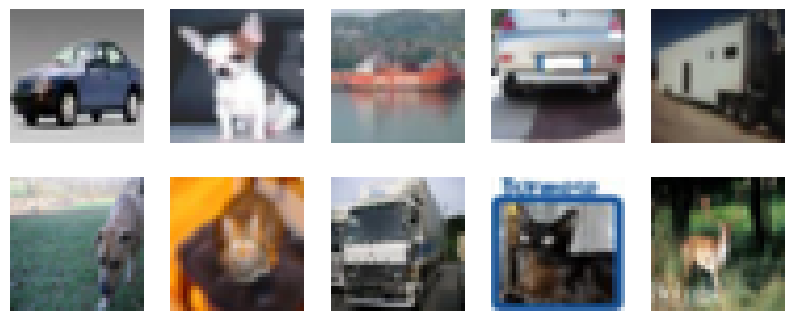

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for a in ax.flat:
    idx = np.random.randint(len(all_x))
    a.imshow(all_x[idx])
    a.set_title('32x32')
    a.axis('off')
plt.savefig('../outputs/figures/lab02_raw_samples.png')
plt.show()

## Part C: Detect Data Quality Issues

In [38]:
valid = 0
invalid = 0

for img in all_x:
    if img.shape == (32, 32, 3):
        valid += 1
    else:
        invalid += 1

print(valid, invalid)

with open('../outputs/logs/lab02_data_issues.txt', 'w') as f:
    f.write(f"Valid: {valid}\nInvalid: {invalid}")

3000 0


## Part D: Data Cleaning

In [39]:
clean_x = all_x
clean_y = all_y

print(len(clean_x))

pd.DataFrame({'Metric': ['Original', 'Cleaned'], 'Count': [len(all_x), len(clean_x)]}).to_csv('../outputs/tables/lab02_cleaning_summary.csv', index=False)

3000


## Part E: Image Preprocessing

In [40]:
proc_64 = (np.array([np.array(Image.fromarray(img).resize((64, 64))) for img in clean_x]) / 255.0).astype(np.float16)
proc_128 = (np.array([np.array(Image.fromarray(img).resize((128, 128))) for img in clean_x]) / 255.0).astype(np.float16)

print(proc_64.dtype, proc_64[0].shape, proc_64.min(), proc_64.max())
print(proc_128.dtype, proc_128[0].shape, proc_128.min(), proc_128.max())

float16 (64, 64, 3) 0.0 1.0
float16 (128, 128, 3) 0.0 1.0


In [41]:
for i in range(50):
    img64 = (proc_64[i] * 255).astype('uint8')
    Image.fromarray(img64).save(f'../data/processed/64x64/proc_64_{i}.png')

    img128 = (proc_128[i] * 255).astype('uint8')
    Image.fromarray(img128).save(f'../data/processed/128x128/proc_128_{i}.png')

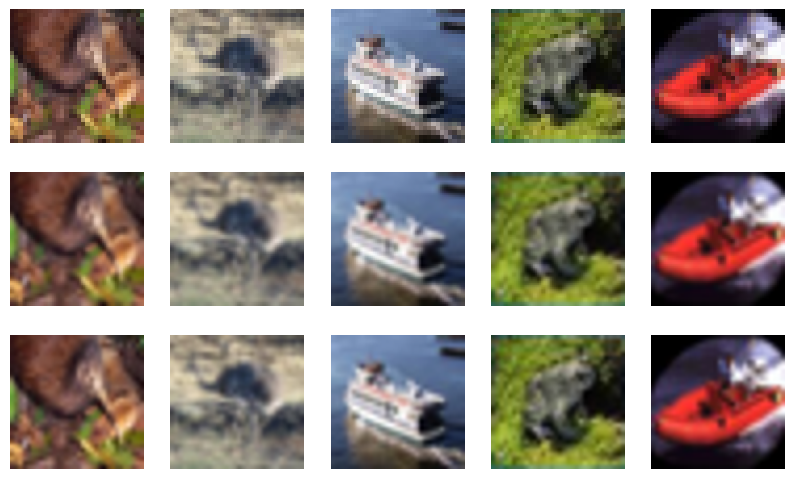

In [42]:
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
idxs = np.random.choice(len(clean_x), 5)

for i, idx in enumerate(idxs):
    ax[0, i].imshow(clean_x[idx])
    ax[0, i].set_title('32x32')
    ax[1, i].imshow(proc_64[idx].astype('float32'))
    ax[1, i].set_title('64x64')
    ax[2, i].imshow(proc_128[idx].astype('float32'))
    ax[2, i].set_title('128x128')
    for a in ax[:, i]: a.axis('off')

plt.tight_layout()
plt.savefig('../outputs/figures/lab02_processed_samples.png')
plt.show()

## Part F: Save Processed Dataset

In [43]:
out = Path('../data/processed')
out.mkdir(parents=True, exist_ok=True)

np.save(out / 'images_64x64.npy', proc_64)
np.save(out / 'images_128x128.npy', proc_128)
np.save(out / 'labels.npy', clean_y)

print('Saved')

Saved


In [44]:
with open('../outputs/logs/lab02_preprocessing_metadata.txt', 'w') as f:
    f.write(f"Date: 2026-01-26\nOriginal: {clean_x.shape}\nProcessed: {proc_64.shape}, {proc_128.shape}\nNorm: 0-1")

## Results
A. 32x32 uint8 [0-255] became 64x64/128x128 float16 [0-1].
B. No issues found.
C. Processed images look same but bigger.
D. Preprocessing makes training stable.

### 1. Why must corrupted samples be removed before training a model?
They can cause errors and make the model learn wrong things.

### 2. What problems can arise if images have inconsistent sizes?
The model expects fixed input size so it will crash.

### 3. Why is normalization important for gradient-based learning?
It helps math work better and learning happen faster.

### 4. Why should raw data never be overwritten?
So we can start over if we mess up.

### 5. How does preprocessing affect model convergence and performance?
It makes it faster and more accurate.

## Conclusion
We used CIFAR-10 data. We checked it and it was clean. We resized images to 64x64 and 128x128 and divided by 255 to normalize. This is important for training models.